# Web Services de l'OGC

Nous allons utiliser la bibliothèque [OWSLib](https://owslib.readthedocs.io/en/latest/) qui permet d'accéder aux différents services Web compatibles avec les standards de l'OGC (WMS, WFS, WMTS, WPS, CSW, etc.) 

## Préambule

Nous importons ici les bibliothèques que nous allons utiliser dans le notebook.

In [111]:
from owslib.wms import WebMapService
from owslib.wfs import WebFeatureService
import pandas as pd

Les URLs des services que nous souhaitons explorer.

In [112]:
url_wms_raster_geoportail = 'https://wxs.ign.fr/essentiels/geoportail/r/wms?SERVICE=WMS&VERSION=1.3.0&REQUEST=GetCapabilities'
url_wfs_geoportail = 'https://wxs.ign.fr/essentiels/geoportail/wfs?SERVICE=WFS&VERSION=2.0.0&REQUEST=GetCapabilities'

## WMS

Explorons le contenu du serveur WMS du geoportail de l'IGN :

In [113]:
wms = WebMapService(url_wms_raster_geoportail, version='1.3.0')
wms

L'object de type `WebMapService` qui est contenu dans la variable `wms` contient des attributs décrivant le Web Service en question (attribut `identification` par exemple), un attribut décrivant les différents opérations supportées (`operations`) et un attribut décrivant les différentes couche qu'il fournit (`contents`) :

In [114]:
wms.identification.title

'Service WMS Raster Geoportail Publics'

In [115]:
wms.identification.type

'WMS'

In [116]:
wms.identification.version

'1.3.0'

In [117]:
wms.identification.abstract

"Ce service permet la visualisation de couches de données raster IGN au travers d'un flux WMS"

Lister les opérations supportées :

In [118]:
wms.operations

Chaque opération est décrite par un objet de type [`OperationMetadata`](), utilisons une bouche pour afficher le nom de chaque opération :

In [119]:
for op in wms.operations:
    print(op.name)

GetCapabilities
GetMap
GetFeatureInfo


Liste des couches disponibles :

In [120]:
wms.contents

OrderedDict([('CADASTRALPARCELS.PARCELLAIRE_EXPRESS',
              <owslib.map.wms130.ContentMetadata at 0x7f93977e8580>),
             ('GEOGRAPHICALGRIDSYSTEMS.PLANIGNV2',
              <owslib.map.wms130.ContentMetadata at 0x7f93976ec670>),
             ('LIMITES_ADMINISTRATIVES_EXPRESS.LATEST',
              <owslib.map.wms130.ContentMetadata at 0x7f93978015d0>),
             ('ORTHOIMAGERY.ORTHOPHOTOS',
              <owslib.map.wms130.ContentMetadata at 0x7f9397801d80>)])

In [121]:
list(wms.contents)

['CADASTRALPARCELS.PARCELLAIRE_EXPRESS',
 'GEOGRAPHICALGRIDSYSTEMS.PLANIGNV2',
 'LIMITES_ADMINISTRATIVES_EXPRESS.LATEST',
 'ORTHOIMAGERY.ORTHOPHOTOS']

On peut explorer les attributs de chacune des couches en utilisant l'objet `WebMapService` comme un dictionnaire et en utilisant les noms des couches comme des clés.


In [122]:
parcellaire_express = wms['CADASTRALPARCELS.PARCELLAIRE_EXPRESS']
parcellaire_express

L'objet qui est retourné dispose de plusieurs attributs décrivant la couche en question : `tile`, `abstract`, `boundingBoxWGS84`, `crsOptions` etc.

In [123]:
parcellaire_express.title

'PCI vecteur'

In [124]:
parcellaire_express.abstract

'Plan cadastral informatisé vecteur de la DGFIP.'

In [125]:
parcellaire_express.styles

{'PCI vecteur': {'title': 'PCI vecteur',
  'legend': 'https://wxs.ign.fr/static/legends/CADASTRALPARCELS.PARCELLAIRE_EXPRESS.png',
  'legend_width': '300',
  'legend_height': '183',
  'legend_format': 'image/png'},
 'normal': {'title': 'Légende générique',
  'legend': 'https://wxs.ign.fr/static/legends/LEGEND.jpg',
  'legend_width': '200',
  'legend_height': '200',
  'legend_format': 'image/jpeg'}}

In [126]:
parcellaire_express.boundingBoxWGS84

(-63.372521503, -21.475586668, 55.925864577, 51.312119281)

In [127]:
parcellaire_express.crsOptions

['EPSG:4558',
 'EPSG:2971',
 'IGNF:REUN47GEO',
 'EPSG:4463',
 'IGNF:LAMB2C',
 'EPSG:2976',
 'EPSG:2972',
 'IGNF:CSG67GEO',
 'IGNF:RGM04GEO',
 'IGNF:UTM39SW84',
 'EPSG:27571',
 'EPSG:27582',
 'EPSG:27564',
 'EPSG:2987',
 'IGNF:UTM30W84',
 'EPSG:2973',
 'EPSG:3945',
 'EPSG:2989',
 'EPSG:27584',
 'EPSG:21781',
 'EPSG:3296',
 'EPSG:2981',
 'EPSG:4275',
 'EPSG:4807',
 'IGNF:UTM20W84MART',
 'IGNF:RGF93CC50',
 'IGNF:LAMB1C',
 'IGNF:WGS84UTM20',
 'IGNF:RGF93CC43',
 'IGNF:REUN47GAUSSL',
 'EPSG:4641',
 'EPSG:32621',
 'EPSG:23031',
 'EPSG:4690',
 'EPSG:23030',
 'EPSG:4258',
 'IGNF:RGF93CC44',
 'IGNF:WGS84G',
 'EPSG:27572',
 'IGNF:RGPFUTM5S',
 'EPSG:4638',
 'EPSG:27561',
 'EPSG:2977',
 'EPSG:3034',
 'EPSG:32738',
 'IGNF:MAYO50GEO',
 'IGNF:GUAD48GEO',
 'EPSG:3044',
 'EPSG:27563',
 'IGNF:RGF93CC45',
 'EPSG:2980',
 'IGNF:LAMB4C',
 'EPSG:4627',
 'IGNF:LAMB2',
 'EPSG:4630',
 'IGNF:CSG67UTM21',
 'EPSG:3949',
 'EPSG:3043',
 'EPSG:4470',
 'IGNF:TAHI79UTM6S',
 'EPSG:4467',
 'EPSG:3171',
 'EPSG:32701',
 'IG

In [128]:
img = wms.getmap(
    layers=['CADASTRALPARCELS.PARCELLAIRE_EXPRESS'],
    size=[600, 400],
    srs="EPSG:4326",
    bbox=[-1.0, 46.0, 8.0, 50.0],
    format="image/jpeg")

On peut afficher l'image dans le notebook :

In [129]:
from IPython.display import Image

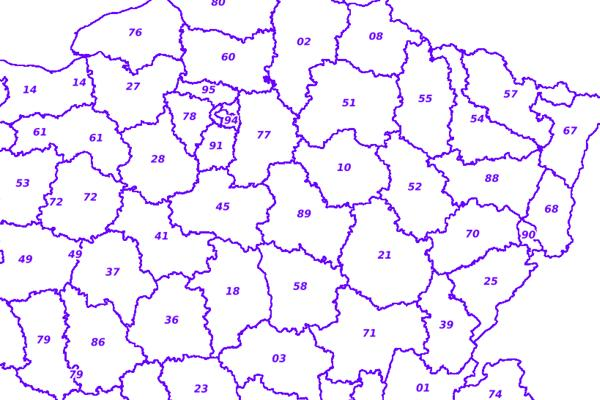

In [130]:
Image(img.read())

Ou la sauvegarder :

In [131]:
with open('/tmp/image.jpeg', 'wb') as f:
    f.write(img.read())

Et pour récupérer automatique des informations sur chacune des couches ?

In [132]:
# Une liste vide
result = []

# Une boucle sur les nom de couche disponibles
for layer_name in wms.contents:
    # Une référence aux metadonnées de la couche en question
    layer = wms[layer_name]
    # Un dictionnaire pour stocker les métadonnes
    # qui nous intéresse pour chaque couche
    data = {
        "id": layer_name,
        "title": layer.title
    }
    # On ajoute le résultat à la liste "result"
    result.append(data)

On a donc créé une liste (un objet Python de type `list`) contenant plusieurs dictionnaires (objet Python de type `dict`), autant qu'il y a de couches décrites par le serveur WMS que nous explorons.

In [133]:
result

[{'id': 'CADASTRALPARCELS.PARCELLAIRE_EXPRESS', 'title': 'PCI vecteur'},
 {'id': 'GEOGRAPHICALGRIDSYSTEMS.PLANIGNV2', 'title': 'Plan IGN v2'},
 {'id': 'LIMITES_ADMINISTRATIVES_EXPRESS.LATEST',
  'title': 'Limites administratives mises à jour en continu.'},
 {'id': 'ORTHOIMAGERY.ORTHOPHOTOS', 'title': 'Photographies aériennes'}]

### Écrire dans un fichier CSV ou dans un fichier excel

La bibliothèque standard de Python propose le module `csv` qui va permettre de manipuler facilement des fichiers CSV (lecture, écriture)  

Pour écrire ou lire des tableurs dans des formats plus compliqués (XLS, XLSX, ODS, etc.) il va être nécessaire d'utiliser des bibliothèques tiers (la bibliothèque `pandas` par exemple).

In [134]:
df = pd.DataFrame(result)

In [135]:
df

,id,title
0,CADASTRALPARCELS.PARCELLAIRE_EXPRESS,PCI vecteur
1,GEOGRAPHICALGRIDSYSTEMS.PLANIGNV2,Plan IGN v2
2,LIMITES_ADMINISTRATIVES_EXPRESS.LATEST,Limites administratives mises à jour en continu.
3,ORTHOIMAGERY.ORTHOPHOTOS,Photographies aériennes


In [136]:
df.to_csv('/tmp/mon_fichier.csv', index=False)

In [137]:
%cat /tmp/mon_fichier.csv

id,title
CADASTRALPARCELS.PARCELLAIRE_EXPRESS,PCI vecteur
GEOGRAPHICALGRIDSYSTEMS.PLANIGNV2,Plan IGN v2
LIMITES_ADMINISTRATIVES_EXPRESS.LATEST,Limites administratives mises à jour en continu.
ORTHOIMAGERY.ORTHOPHOTOS,Photographies aériennes


## Exercice - WFS

Explorons désormais le contenu du serveur WFS du geoportail de l'IGN (dont l'url est contenue dans la variable `url_wfs_geoportail`).

Répéter les opérations présentées ci-dessus mais sur le flux WFS suivant :

In [138]:
wfs = WebFeatureService(url_wfs_geoportail, version='2.0.0')

Pour chaque couche, vous devez stocker son identifiant, son titre, sa description et sa bounding-box en WGS84.

Le tableur obtenu doit ainsi être de la forme suivante :

| Couche | Titre | Abstract | Bounding Box WGS84 |
|--------|-------|------|------|
| CADASTRALPARCELS.PARCELLAIRE_EXPRESS | PCI vecteur | Plan cadastral informatisé vecteur de la DGFIP. | YYYY |
| GEOGRAPHICALGRIDSYSTEMS.PLANIGNV2 | Plan IGN v2 | Cartographie multi-échelles sur le territoire national, issue des bases de données vecteur de l’IGN, mis à jour régulièrement et réalisée selon un processus entièrement automatisé. | YYYY | 

Vous devez stocker ces informations sous forme d'une liste de dictionnaires, puis convertir le résultat en un objet `DataFrame` et exportez le résultat au format CSV (méthode `to_csv`) ou au format Excel (méthode `to_excel`). 

**_À vous de jouer...!_**

## Solution

In [145]:
# On se connecte au service WFS souhaité
wfs = WebFeatureService(url_wfs_geoportail, version='2.0.0')

# Une liste vide pour accueillir les résultats
resultat = []

# On fait une boucle sur la liste contenant les noms de couche
for l_name in wfs.contents:
    # On stocke une référence à l'objet ContentMetadata
    # décrivant la couche avec le nom contenu dans la variable "l_name"
    l = wfs[l_name]

    # On créé un dictionnaire pour stocker la description de cette couche
    d = {
        'Couche': layer_name,
        'Title': l.title,
        'Description': l.abstract,
        'Bounding Box WGS84': str(l.boundingBoxWGS84).replace('(', '').replace(')', '')
    }

    # Ajout à la list de résultats
    resultat.append(d)

# Convertir notre liste de dictionnaires en 
# un DataFrame pandas
df_wfs = pd.DataFrame(resultat)

# Export vers un fichier
df_wfs.to_csv('/tmp/wfs_geoportail_description.csv', index=False)

Aperçu du fichier CSV exporté :

In [146]:
%cat /tmp/wfs_geoportail_description.csv

Couche,Title,Description,Bounding Box WGS84
ORTHOIMAGERY.ORTHOPHOTOS,BDTOPO_V3:batiment.title,BDTOPO V3 23.3 édition 2023,"-63.153333951602704, -21.389720340767205, 55.8367590264458, 51.3127196937117"
ORTHOIMAGERY.ORTHOPHOTOS,BDTOPO_V3:troncon_de_route.title,BDTOPO V3 23.3 édition 2023,"-63.153333951602704, -21.389720340767205, 55.8367590264458, 51.3127196937117"
ORTHOIMAGERY.ORTHOPHOTOS,CADASTRALPARCELS.PARCELLAIRE_EXPRESS:parcelle.title,Plan cadastral informatisé vecteur de la DGFIP édition 07-2023.,"-63.15331686629, -21.3897472604766, 55.8366858738437, 51.088897403453"
